# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import \
    classification_report, roc_auc_score, roc_curve, auc

data = pd.read_csv('spam_or_not_spam.zip')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [2]:
data.groupby('label').count()

,email
label,
0,2500
1,499


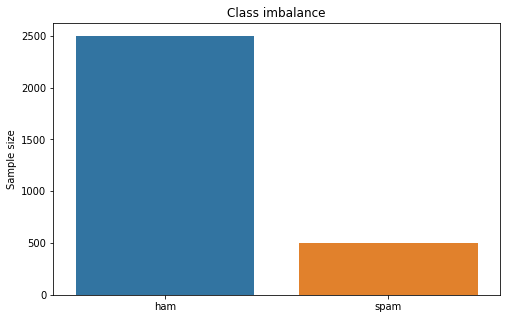

In [3]:
fig, axes = plt.subplots(figsize=(8, 5))
sns.countplot(data=data, x='label')
axes.set_title('Class imbalance')
axes.set_xlabel(None)
axes.set_ylabel('Sample size')
axes.set_xticks(ticks=range(2), labels=['ham', 'spam'])
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [5]:
data = data.replace('^\s*$', np.NaN)
data = data[~data['email'].isna()]

Переводим данные в векторный вид:

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['email'])

Определите, сколько теперь признаков в нашем наборе данных:

In [7]:
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [8]:
X = X.toarray()
y = data['label']

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [10]:
y_test.mean()

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [11]:
bayes_class = ComplementNB(alpha=0.01)
bayes_class.fit(X_train, y_train)
y_train_pred = bayes_class.predict(X_train)
y_test_pred = bayes_class.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [12]:
print(classification_report(y_test, y_test_pred, digits=3))

              precision    recall  f1-score   support

           0      0.997     0.997     0.997       627
           1      0.984     0.984     0.984       123

    accuracy                          0.995       750
   macro avg      0.990     0.990     0.990       750
weighted avg      0.995     0.995     0.995       750



Нарисуйте ROC-кривую:

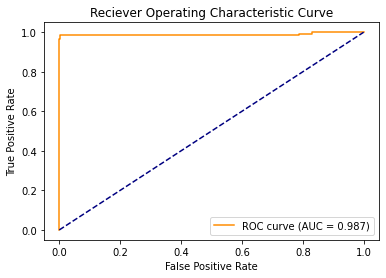

In [13]:
# Probability estimations of spam
probs = bayes_class.predict_proba(X_test)[:, 1]

# Area under the reciever operating characteristic curve
roc_auc = roc_auc_score(y_test, probs) 

# False positive rate, true positive rate, threshold
fprs, tprs, thres = roc_curve(y_test, probs)

plt.plot(fprs, tprs, color='darkorange',
         label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Curve')
plt.legend()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [14]:
for alpha in np.linspace(0.01, 3.5, num=10):
    model = ComplementNB(alpha=alpha)
    print('alpha = {:.3f}; F1-score = {:.3f}'.format(
        alpha,
        cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())
    )

alpha = 0.010; F1-score = 0.956
alpha = 0.398; F1-score = 0.968
alpha = 0.786; F1-score = 0.968
alpha = 1.173; F1-score = 0.962
alpha = 1.561; F1-score = 0.951
alpha = 1.949; F1-score = 0.947
alpha = 2.337; F1-score = 0.928
alpha = 2.724; F1-score = 0.919
alpha = 3.112; F1-score = 0.888
alpha = 3.500; F1-score = 0.866
